<a href="https://colab.research.google.com/github/unik1-web/python/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Python_bootcamp_Day_1_%D0%97%D0%BD%D0%B0%D0%BA%D0%BE%D0%BC%D1%81%D1%82%D0%B2%D0%BE_%D1%81_Python%2C_%D0%A2%D0%93_%D0%B1%D0%BE%D1%82_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Сегодня мы познакомимся с Python и создадим Телеграм-бота для обработки файлов.

Как будет проходить работа:

* 3 теоретических блока от простого к сложному
* Сначала изучаем небольшие участки кода, потом собираем бота воедино
* Домашнее задание предусмотрено для двух уровней сложности

[Ссылка](https://colab.research.google.com/drive/1DThU6_UAeh5j_gca1wzTGjcNV6qsM3h7?usp=sharing) на заполненную рабочую тетрадь

[Ссылка](https://colab.research.google.com/drive/1ZRDVHaq_kolboPZR7k4Pg5yN_DcoU9bx?usp=sharing) на новую рабочую тетрадь

[Презентация](https://docs.google.com/presentation/d/1NpgnoHGAa3vjVCGYTDXIY9pXJxo_KaqRaQAN7Ny1eKs/edit?usp=sharing)

## 1. Основные конструкции языка



Формат скрипта на Python: *одна строка - одна команда*

## 1.1 Переменная

Данные хранятся в **переменных** – областях памяти, которым дали имя


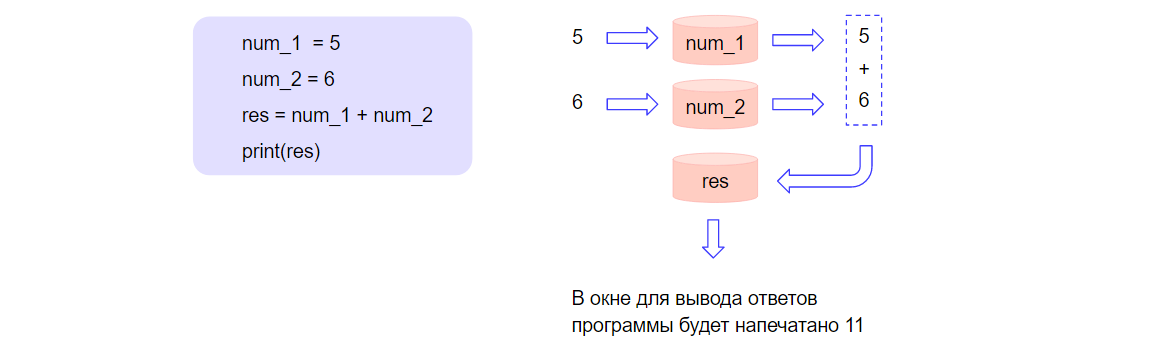

In [ ]:
num_1 = 5
num_2 = 6
res = num_1  + num_2
print(res)

11


## 1.2 Функция

Набор инструкций, которым дали имя и возможность задавать параметры (аргументы)

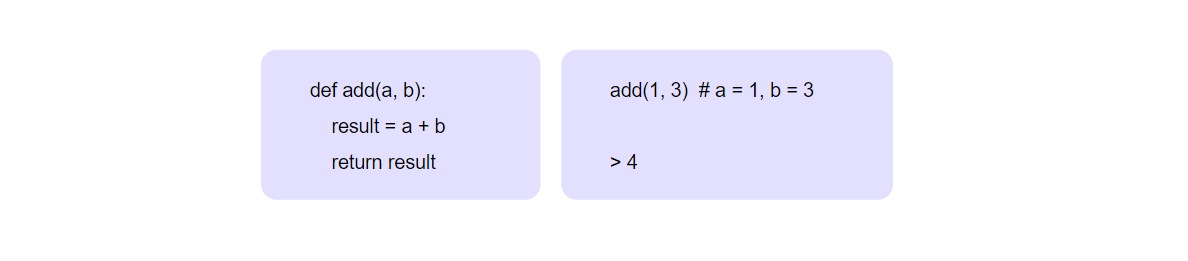

In [ ]:
def add(a,b):
  result = a + b
  return result

#print(add(1,3))

4


In [ ]:
add(1,3)

4

## 1.3 Текст

Для того, чтобы текст, который мы хотим положить в переменную, отличался от названия самой переменной, текст обрамляется одинарными или двойными кавычками

Мы можем объединять тексты с помощью операции +

**Задача**: создайте текст из нескольких переменных

## 1.4 Библиотеки

* Прежде чем использовать какую-то функцию сложнее арифметических операций, нужно сказать окружению о подключении пакета
> import имя_пакета

* Если пакет не входит в стандартный набор, его нужно скачать с помощью команды
> !pip install имя_пакета

Восклицательный знак говорит о том, что это команда операционной системы, вне Python


In [ ]:
# Эту ячейку нужно просто запустить
!pip install pyTelegramBotAPI

## 1.5 На что еще обратить внимание

* **Отступы** — часть синтаксиса!
* **Комментарии** начинаются с символа # и продолжаются до конца строки​
* Python обращает внимание **на большие и маленькие буквы**: Hello, hello, HELLO — разные имена​
* Имена переменных и функций должны начинаться с буквы или _ : x1, x2, _f​



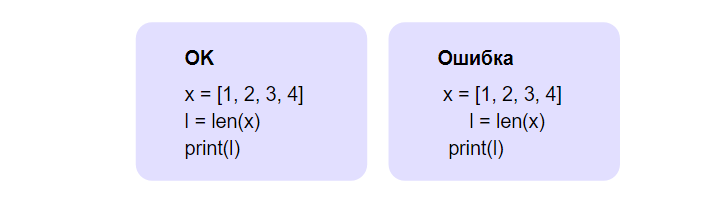

# 2.Телеграм-бот

## 2.1 Регистрируем нового бота

* Открываем https://t.me/BotFather
* Пишем `/newbot`
* Придумываем имя
* Получаем токен


<img src='https://drive.google.com/uc?export=view&id=1k6ZO5bbXOD6kDXzyNvVoA-Pa02DPPnNN' width=500 border='0' alt=''>


## 2.2 Объект

Составная переменная, к которой привязан набор **атрибутов** и функций.

Бот представляет собой объект, а токен является его обязательным атрибутом

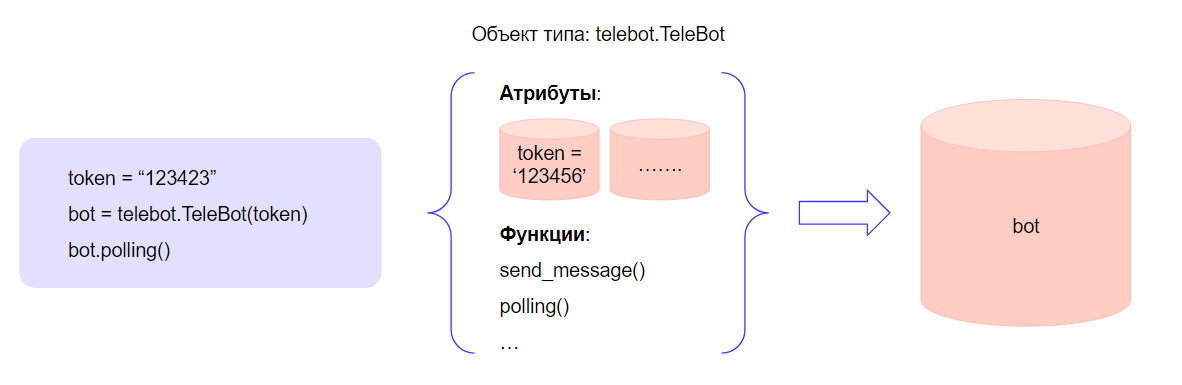

In [ ]:
# Подключаем библиотеку
import telebot

# Здесь нужно вставить токен, который дал BotFather при регистрации
# Пример: token = '2007628239:AAEF4ZVqLiRKG7j49EC4vaRwXjJ6DN6xng8'
token = '<ваш токен>'  # <<< Ваш токен

# В этой строчке мы заводим бота и даем ему запомнить токен
bot = telebot.TeleBot(token)

# Пишем первую функцию, которая отвечает "Привет" на команду /start
# Все функции общения приложения с ТГ спрятаны в функции под @
@bot.message_handler(commands=['start'])
def say_hi(message):
    bot.send_message(message.chat.id, 'Привет')

# Запускаем бота. Он будет работать до тех пор, пока работает ячейка
# (крутится значок слева).
# Остановим ячейку - остановится бот
bot.polling()

**Задача**: обновите текст приветствия

## 2.3 Содержание сообщений

https://core.telegram.org/bots/api#message - описание возможных атрибутов

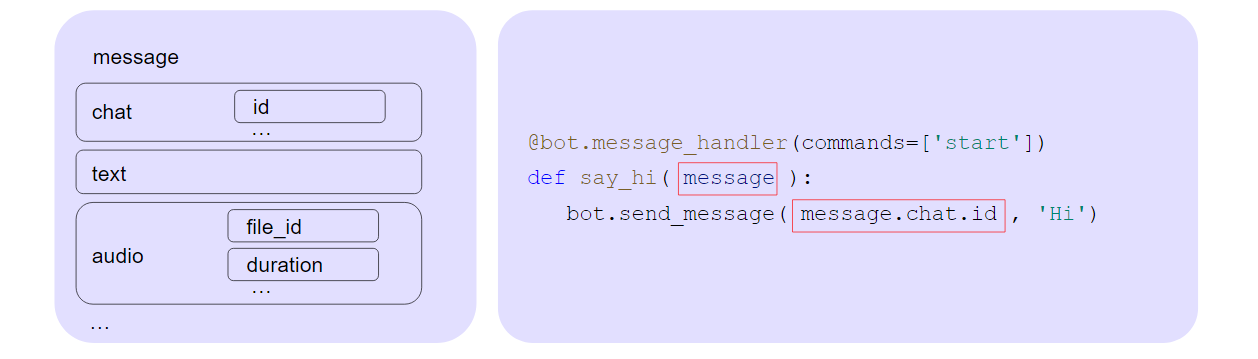

**N.B.** Если дальнейший материал покажется сложным - можно остановиться здесь.

### **Домашнее задание (простой уровень)**
Улучшите функцию приветствия, добавив имя пользователя.

### Подсказка 1

В каком атрибуте хранится имя пользователя, можно посмотреть в документации к API Телеграма: https://core.telegram.org/bots/api#message

### Подсказка 2

* Имя пользователя хранится в атрибуте `message.chat.first_name` https://core.telegram.org/bots/api#chat
* Текст из разных кусочков мы собираем с помощью оператора +: `"Hello, " + message.chat.first_name`

# 3. Преобразование голоса в текст

Добавим полезную функциональность в наш бот.

Мы воспользуемся библиотеками [SpeechRecognition](https://pypi.org/project/SpeechRecognition/) для преобразования голоса в текст и библиотекой [pydub](http://pydub.com/) для преобразования форматов файлов

In [ ]:
!pip install SpeechRecognition
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 32.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 3.1 Преобразование формата аудио oga → wav

Телеграм отправляет голосовые в формате **.oga**, а SpeechRecognition нужен формат **.wav**.

Напишем функцию для преобразования файла:

In [ ]:
from pydub import AudioSegment

def oga2wav(filename):
    # Переименование формата: 'sample.oga' -> 'sample.wav'
    new_filename = ...
    # Читаем файл с диска с помощью функции AudioSegment.from_file()
    audio = ...
    # Экспортируем файл в новом формате
    audio.export(..., format=...)
    # Возвратим в качестве результата функции имя нового файла
    return ...

Скачаем тестовый файл и протестируем функцию преобразования

In [ ]:
import urllib

url = "https://drive.google.com/uc?export=view&id=1aBZnHgsjg7XIVlvpYasOOJ8hurp7V6Ww"
filename = "skillbox_voice_sample.oga"
urllib.request.urlretrieve(url, filename)

In [ ]:
# Не забудьте нажать значок обновления папки, чтобы увидеть новый файл
oga2wav(filename)

## 3.2 Преобразование голоса в текст

`with open(...) as f` означает "открыть файл и использовать как перемнную sourse", почле чего можно считать оттуда данные в объект-распознаватель с помощью функии `source`

In [ ]:
import speech_recognition

In [ ]:
recognizer = ...

with speech_recognition.WavFile('skillbox_voice_sample.wav') as source:
     wav_audio = ...

recognizer.recognize_google(..., language='ru')

Научимся удалять файлы с диска, чтобы он не переполнился ненужными файлами

In [ ]:
import os

In [ ]:
# Вылетит ошибка, если файл не найден
os.remove('skillbox_voice_sample.wav')

In [ ]:
# Правим ошибку: добавляем условие
# Если файл существует - удалить с диска



In [ ]:
def recognize_speech(oga_filename):
    wav_filename = oga2wav(oga_filename)
    recognizer = speech_recognition.Recognizer()

    with speech_recognition.WavFile(wav_filename) as source:
        wav_audio = recognizer.record(source)

    text = recognizer.recognize_google(wav_audio, language='ru')

    if os.path.exists(oga_filename):
        os.remove(oga_filename)

    if os.path.exists(wav_filename):
        os.remove(wav_filename)

    return text

In [ ]:
recognize_speech('skillbox_voice_sample.oga')

## 3.3 Скачивание файла из Телеграм

Порядок действий:
1. По ID файла получаем информацию о нем (`file_info`)
2. Из информации берем путь к файлу и загружаем по нему данные
3. Формируем уникальное имя файла `filename`, скомбинировав id и путь к файлу (последний содержит разрешение), заменяем символ "/" на "_", чтобы избежать ошибок при сохранении файла
4. `with open(...) as f` означает "открыть файл и использовать как переменную f", далее записываем туда данные, параметр `'wb'` расшифровывается как write bytes

In [ ]:
def download_file(bot, file_id):
    # Получаем информацию о файле с помощью функции bot.get_file
    file_info = ...

    # загружаем файл с помощью функции bot.download_file
    # по информации о файле file_info.file_path
    downloaded_file = ...

    # Имя файла делаем уникальным: id файла + file_info.file_path
    filename = file_id + file_info.file_path

    # file_info.file_path имеет вид voice/file_123.oga,
    # чтобы избежать ошибок из-за косой черты, заменим ее на _
    filename = ...

    with open(filename, 'wb') as f:
        f.write(downloaded_file)

    return filename

## 3.4 Собираем итоговую функцию

In [ ]:
# Новое условие на срабатывание: content_types=['voice']
@bot.message_handler(...)
def transcript(message):
    # id файла - в message.voice.file_id
    filename = download_file(bot, ...)
    # Распознаем запись с помощью нашей функции recognize_speech
    text = ...
    # Отправляем пользователю в ответ текст
    bot.send_message(message.chat.id, text)

# ИТОГ: Запускаем бота для перевода голоса в текст

In [ ]:
!pip install pyTelegramBotAPI SpeechRecognition pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.9/222.9 KB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 27.9 MB/s eta 0:00:00
  Created wheel for pyTelegramBotAPI: filename=pyTelegramBotAPI-4.10.0-py3-none-any.whl size=205421 sha256=aa567df1ec10bf7a428c9751630303eb88a554d90e98eb414ffe2c7e1f51f0a9
  Stored in directory: /root/.cache/pip/wheels/ef/ba/4b/187be68f61aa7818b28d8b21200d130fd35ba36f002efcc262
Successfully built pyTelegramBotAPI


Инструкция по регистрации бота - в пункте 2.1

In [ ]:
import os
import telebot
import speech_recognition
from pydub import AudioSegment


# Ниже нужно вставить токен, который дал BotFather при регистрации
# Пример: token = '2007628239:AAEF4ZVqLiRKG7j49EC4vaRwXjJ6DN6xng8'
token = '<ваш токен>'  # <<< Ваш токен

bot = telebot.TeleBot(token)


def oga2wav(filename):
    # Конвертация формата файлов
    new_filename = filename.replace('.oga', '.wav')
    audio = AudioSegment.from_file(filename)
    audio.export(new_filename, format='wav')
    return new_filename


def recognize_speech(oga_filename):
    # Перевод голоса в текст + удаление использованных файлов
    wav_filename = oga2wav(oga_filename)
    recognizer = speech_recognition.Recognizer()

    with speech_recognition.WavFile(wav_filename) as source:
        wav_audio = recognizer.record(source)

    text = recognizer.recognize_google(wav_audio, language='ru')

    if os.path.exists(oga_filename):
        os.remove(oga_filename)

    if os.path.exists(wav_filename):
        os.remove(wav_filename)

    return text


def download_file(bot, file_id):
    # Скачивание файла, который прислал пользователь
    file_info = bot.get_file(file_id)
    downloaded_file = bot.download_file(file_info.file_path)
    filename = file_id + file_info.file_path
    filename = filename.replace('/', '_')
    with open(filename, 'wb') as f:
        f.write(downloaded_file)
    return filename


@bot.message_handler(commands=['start'])
def say_hi(message):
    # Функция, отправляющая "Привет" в ответ на команду /start
    bot.send_message(message.chat.id, 'Привет')


@bot.message_handler(content_types=['voice'])
def transcript(message):
    # Функция, отправляющая текст в ответ на голосовое
    filename = download_file(bot, message.voice.file_id)
    text = recognize_speech(filename)
    bot.send_message(message.chat.id, text)


# Запускаем бота. Он будет работать до тех пор, пока работает ячейка
# (крутится значок слева).
# Остановим ячейку - остановится бот
bot.polling()

### **Домашнее задание (продвинутый уровень)**
Добавьте отправку собственного
стикера

Файл можно загрузить в рабочую область через панель слева (значок папки)

### Подсказка

* Стикеры отправляются в формате **.webp**
* Стикер отправляется с помощью функции `send_sticker`
* Пример использования можно посмотреть
в описании библиотеки https://github.com/eternnoir/pyTelegramBotAPI